# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [101]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [102]:
# load dataset
df = pd.read_csv("loan_prediction.csv")
# shape of df
df.shape

(614, 13)

In [103]:
assert df.shape == (614, 13)

In [104]:
# head of df
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [105]:
df.drop('Loan_ID', axis=1, inplace=True)
df["Loan_Status"] = df["Loan_Status"].astype("category").cat.codes

In [106]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [110]:
stats = pd.DataFrame(columns = ['type', '# null', '# unique', 'unique values'], index = df.columns)

In [114]:
for col in df.columns:
    stats.loc[col]['type'] = df[col].dtype
    stats.loc[col]['# null'] = df[col].isnull().sum()
    stats.loc[col]['# unique'] = df[col].nunique()
    unique_values = filter(lambda x : x != 'nan', map(str, pd.unique(df[col]).tolist()))
    final_list = ' - '.join(unique_values)
    if(df[col].nunique() >= 10) :
        final_list = final_list[0:20] + ' ...'
    stats.loc[col]['unique values'] = final_list
stats

,type,# null,# unique,unique values
Gender,object,13,2,Male - Female
Married,object,3,2,No - Yes
Dependents,object,15,4,0 - 1 - 2 - 3+
Education,object,0,2,Graduate - Not Graduate
Self_Employed,object,32,2,No - Yes
ApplicantIncome,int64,0,505,5849 - 4583 - 3000 - ...
CoapplicantIncome,float64,0,287,0.0 - 1508.0 - 2358. ...
LoanAmount,float64,22,203,128.0 - 66.0 - 120.0 ...
Loan_Amount_Term,float64,14,10,360.0 - 120.0 - 240. ...
Credit_History,float64,50,2,1.0 - 0.0


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [115]:
df["Married"].fillna(df["Married"].mode()[0], inplace = True)
df = df.dropna() 
print(df.shape)

(480, 12)


In [116]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

<AxesSubplot:title={'center':'Loan_Status'}, xlabel='Loan_Status'>

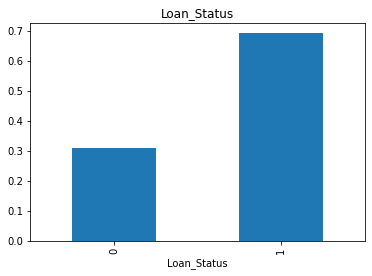

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
# print ('loan rate =', df.Loan_Status.mean())
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar",title="Loan_Status")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [118]:
print ('Loan rate OK =', df.Loan_Status.mean())
print ('No loan =', 1 - df.Loan_Status.mean())

Loan rate OK = 0.6916666666666667
No loan = 0.30833333333333335


In [119]:
# If prediction is always equal to 1, you can get around 70% of accuracy

6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [120]:
def make_bar_plot(df, column):
    df_bar=pd.DataFrame()
    df_bar['total']=df.groupby(column).size()
    df_bar['Loan_Status'] = df.groupby(column).sum()['Loan_Status']
    df_bar['percentage'] = (round(df_bar['Loan_Status']/df_bar['total']*100,2))/100
    print(df_bar)
    
    df_bar['percentage'].plot(kind="barh",alpha=1,title="Loan_Status "+str(column))
    plt.show()

               total  Loan_Status  percentage
Property_Area                                
Rural            139         85.0      0.6115
Semiurban        191        149.0      0.7801
Urban            150         98.0      0.6533


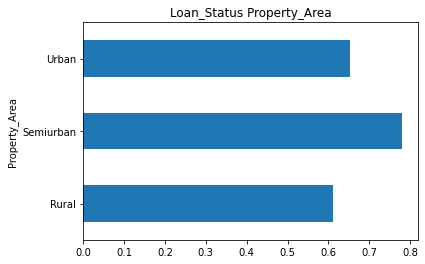

In [121]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [122]:
def make_box_plot(df, col):  
    fig = plt.figure(figsize=(6, 4))
    fig.clf()
    ax = fig.gca()
    df.boxplot(column = col, by = 'Loan_Status', ax = ax)
    ax.set_xlabel('Loan_Status')
    ax.set_title(col)

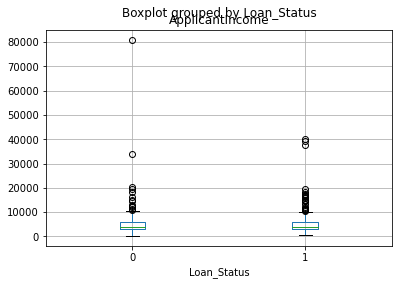

In [123]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

********* Gender *********
        total  Loan_Status  percentage
Gender                                
Female     86         54.0      0.6279
Male      394        278.0      0.7056


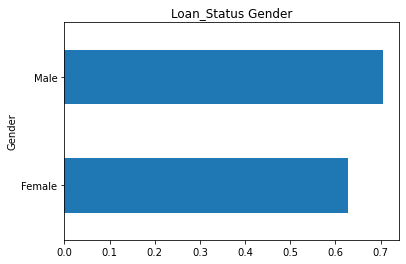

********* Married *********
         total  Loan_Status  percentage
Married                                
No         169        105.0      0.6213
Yes        311        227.0      0.7299


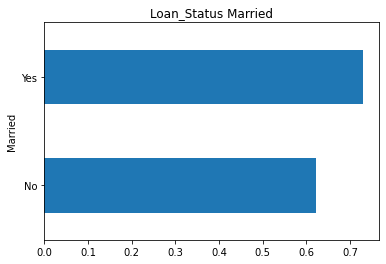

********* Dependents *********
            total  Loan_Status  percentage
Dependents                                
0             274        187.0      0.6825
1              80         52.0      0.6500
2              85         65.0      0.7647
3+             41         28.0      0.6829


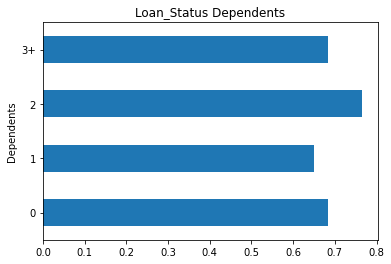

********* Education *********
              total  Loan_Status  percentage
Education                                   
Graduate        383        271.0      0.7076
Not Graduate     97         61.0      0.6289


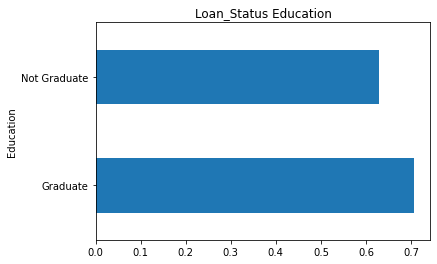

********* Self_Employed *********
               total  Loan_Status  percentage
Self_Employed                                
No               414        289.0      0.6981
Yes               66         43.0      0.6515


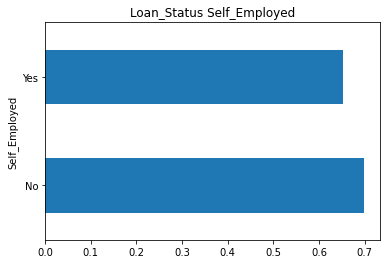

********* ApplicantIncome *********
********* CoapplicantIncome *********
********* LoanAmount *********
********* Loan_Amount_Term *********
********* Credit_History *********
********* Property_Area *********
               total  Loan_Status  percentage
Property_Area                                
Rural            139         85.0      0.6115
Semiurban        191        149.0      0.7801
Urban            150         98.0      0.6533


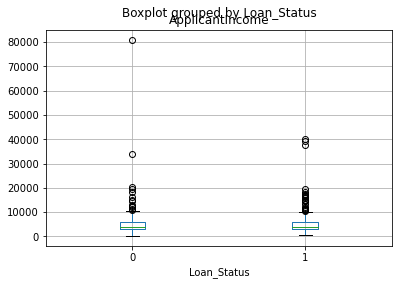

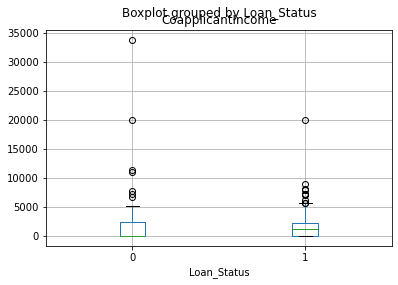

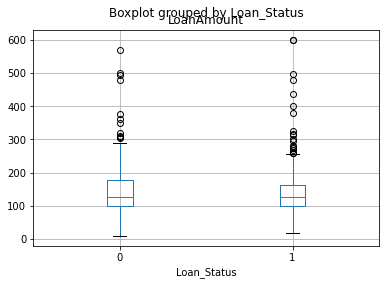

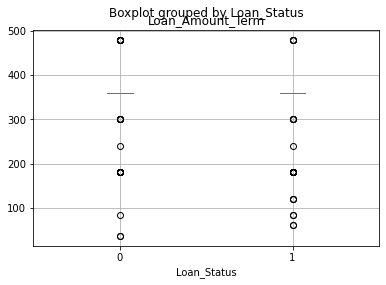

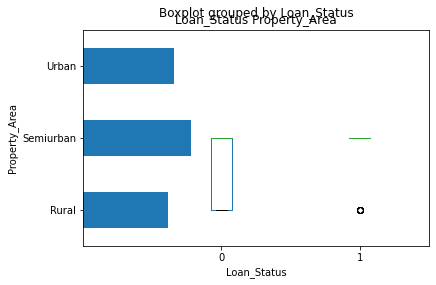

********* Loan_Status *********


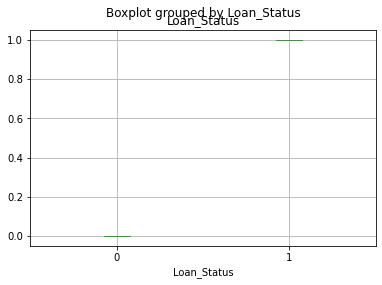

In [124]:
for col in df:
    print(f'********* {col} *********')
    if df[col].dtype == 'object' :
        make_bar_plot(df, col)
    else :
        make_box_plot(df, col)

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [125]:
cat = ['Property_Area', 'Dependents']
for feature in cat :
    dum = pd.get_dummies(df[feature], prefix=feature)
    df = df.drop(feature, axis=1)
    df = df.join(dum)

print the head of df

In [126]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [127]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [128]:
for col in df.columns: # Loop through all columns in df
    if df[col].dtype == 'object':  # check if column's type is object (text)
        df[col] = pd.Categorical(df[col]).codes  # convert text to numerical

Print the head of df

In [129]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [130]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [131]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (336, 16) (336,)
test shape (144, 16) (144,)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [133]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.7976190476190477
test accuracy = 0.7986111111111112


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [134]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print (metrics.confusion_matrix(y_test, y_pred))

[[22 25]
 [ 4 93]]


In [135]:
matrice = metrics.confusion_matrix(y_test, y_pred)
# true negative (TN) = 22
print('TN', matrice[0][0])
# false positive (FP) = 25
print('FP', matrice[0][1])
# false negative (FN) = 4
print('FN', matrice[1][0])
# true positive (TP) = 93
print('TP', matrice[1][1])

# Precision = TruePositives / (TruePositives + FalsePositives)
precision_0 = (matrice[1][1])/(matrice[1][1]+matrice[0][1])
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall_1 = (matrice[1][1])/(matrice[1][1]+matrice[1][0])

print ('precision_0 =', precision_0)
print ('recall_1 =', recall_1)

TN 22
FP 25
FN 4
TP 93
precision_0 = 0.788135593220339
recall_1 = 0.9587628865979382


10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [136]:
# evaluate the model using 5-fold cross-validation
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
# see model 
print(scores)
print ('scores mean =', scores.mean(), 'scores std =', scores.std())

[0.80208333 0.78125    0.78125    0.875      0.79166667]
scores mean = 0.80625 scores std = 0.03523236359434951


how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.